## Objectives
1. Use the `iloc` and `loc` operators to access slices of the rows and columns of a DataFrame
2. Use Boolean expressions to select rows of a DataFrame based on one or more conditions
3. Combine multiple data manipulation steps to answer a question using data

## Exercises
In this lab, you will use the Baby Names dataset that *Data.gov* releases each year to practice working with data using Pandas. The dataset contains the total number of babies born with a given first name and gender each year from 1880 through 2018. The file size is fairly large, so you will not be able to open the full dataset in Excel. The first five lines out of nearly two million are:
```
Id,Name,Year,Gender,Count
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
```

Fortunately, this dataset is already in a tidy form so we will not need to reshape it to begin. Each row represents a unique instance of a name-gender-year combination. In addition to those columns, the Count column represents the number of babies born for that name-gender-year instance.

*Note: to protect individual's privacy, Data.gov does not publish names with fewer than five births for that given name.*

### Load the Libraries
Run the following code cell to import each of the libraries that we will use in the lab.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explore the Data
In the next several exercises, you will use Pandas attributes and methods to become familiar with the data.

**Note: Jupyter Notebook formats the output of Pandas objects nicely. As such, you should NOT use the `print` function unless specifically instructed. Furthermore, we will explicitly define what variable name you should assign a result if we will continue to use it; otherwise, you may assume that the output is not required for future computations and is meant only for us to be able to inspect and explore.**

**Q1.1.** In the below cell, read the 'babynames.csv' file to a `DataFrame` named `names`. Specify the `Id` column as the index. Inspect the first five lines.

In [2]:
### BEGIN SOLUTION
names = pd.read_csv('babynames.csv', index_col = 0)
names.head()
### END SOLUTION

C:\Users\DFCS-Dell1\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746


In [3]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_df = pd.read_csv('babynames.csv', index_col = 0)
if names is None:
    raise NameError("Did not name your DataFrame correctly")
else:
    pd.testing.assert_frame_equal(_, test_df.head())
    pd.testing.assert_frame_equal(names.tail(), test_df.tail())
### END HIDDEN TESTS

**Q1.2.** Output information regarding the DataFrame attributes using the `info` method.

In [4]:
### BEGIN SOLUTION
names.info()
### END SOLUTION

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956187 entries, 1 to 1956187
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Year    int64 
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 74.6+ MB


In [5]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
assert '.info()' in In[-2]
### END HIDDEN TESTS

**Q1.3.** Determine the number of observations for each gender. You can determine this by calling the `value_counts` method on the `Gender` column.

In [6]:
### BEGIN SOLUTION
names.Gender.value_counts()
### END SOLUTION

F    1156014
M     800173
Name: Gender, dtype: int64

In [7]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_series_equal(_, test_df.Gender.value_counts())
### END HIDDEN TESTS

Why do you think there are so many more female observations than male? Does that mean that there are that many more girls born than boys?

**Q1.4.** Use the below Markdown cell to summarize what the difference in these numbers mean:

One can use the `describe` method for Series or DataFrame objects and its behavior will change depending on the type of data.

**Q1.5.** In the below cell, call the `describe` method on the entire DataFrame.

In [8]:
### BEGIN SOLUTION
names.describe()
### END SOLUTION

,Year,Count
count,1.956187e+06,1.956187e+06
mean,1.975552e+03,1.797040e+02
std,3.419284e+01,1.522881e+03
min,1.880000e+03,5.000000e+00
25%,1.952000e+03,7.000000e+00
50%,1.985000e+03,1.200000e+01
75%,2.004000e+03,3.200000e+01
max,2.018000e+03,9.968000e+04


In [9]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.describe())
### END HIDDEN TESTS

**Q1.6.** In the below cell, call the `describe` method on the `Name` column.

In [10]:
### BEGIN SOLUTION
names.Name.describe()
### END SOLUTION

count     1956187
unique      98328
top        Sidney
freq          278
Name: Name, dtype: object

In [11]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_series_equal(_, test_df.Name.describe())
### END HIDDEN TESTS

The `describe` method returns summary statistics for a given DataFrame or Series. The statistics that it contains depends on the type of data in the DataFrame or Series.

Looking at the output, does this mean John is the most popular name? We will explore this question later in the lab.

### 2. Indexing in Pandas
#### `loc` and `iloc`
The Kaggle lesson reviewed three different ways to access a subset of data within a DataFrame. The naive method is to use the `[]` indexing operator similar to lists or dictionaries. This can be convenient, but the more appropriate method is to use either the `loc` or `iloc` operators.

**Q2.1.** In the below cell, use the `iloc` method to access the first row of data:

In [12]:
### BEGIN SOLUTION
names.iloc[0]
### END SOLUTION

Name      Mary
Year      1880
Gender       F
Count     7065
Name: 1, dtype: object

In [13]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_series_equal(_, test_df.iloc[0])
### END HIDDEN TESTS

Take note that when there is only a single dimension (one row or one column) of data, Pandas will return a Series. It is important to know what type of object a statement will return so you know what attributes and methods are available to that object. It is also important to know whether a method modifies the object in-place or returns a new object. In the former, an assigment operator is not necessary while the latter requires an assignment if you are going to use the resulting object in the future.

**Q2.2.** Again, use the `iloc` operator to output the value in the first row and column:

In [14]:
### BEGIN SOLUTION
names.iloc[0, 0]
### END SOLUTION

'Mary'

In [15]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
assert _ == test_df.iloc[0,0]
### END HIDDEN TESTS

Using a list for both the rows and columns will force Pandas to return a DataFrame, even if the resulting object only has a single dimension or is a single value. The below table summarizes the resulting object type, but you should explore each statement for yourself:

| Statement | Type |
| :----: | :----: |
| `names.iloc[0]` |  Series |
| `names.iloc[:, 0]` | Series |
| `names.iloc[[0]]` | DataFrame |
| `names.iloc[0, 0]` | String |
| `names.iloc[[0], 0]` | Series |
| `names.iloc[[0], [0]]` | DataFrame |

**Q2.3.** Use the `.loc` operator to access and output the `Count` column.

In [16]:
### BEGIN SOLUTION
names.loc[:, 'Count']
### END SOLUTION

Id
1          7065
2          2604
3          2003
4          1939
5          1746
           ... 
1956183       5
1956184       5
1956185       5
1956186       5
1956187       5
Name: Count, Length: 1956187, dtype: int64

In [17]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_series_equal(_, test_df.loc[:, 'Count'])
### END HIDDEN TESTS

#### Conditional Selection
The power of Pandas comes from being able to subset our data using Boolean expressions. This will allow us to answer interesting questions and perform operations on a subset of our data.

There are two important difference between Boolean expressions in Pandas and those in the standard Python libraries. First, we will not be able to use the `and` and `or` Boolean operators because much of Pandas is built on libraries from the C programming language. Instead, we will use the `&` and `|` Boolean operators respectively. Second, we must enclose each Boolean expression in parenthesis when they are combined with a Boolean operator.

Run the below code cell and note three things:
* the values of the resulting Series
* the length is the number of rows in the DataFrame
* we often use the attribute to apply a Boolean expression to an entire column

In [18]:
names.Name == 'Mark'

Id
1          False
2          False
3          False
4          False
5          False
           ...  
1956183    False
1956184    False
1956185    False
1956186    False
1956187    False
Name: Name, Length: 1956187, dtype: bool

**Q2.4.** If we use this Boolean expression inside of the `.loc` operator, it will return only the rows where the Boolean expression is `True`. In the below code cell, output only those rows where the Name value is 'Mark'.

In [19]:
### BEGIN SOLUTION
names.loc[names.Name == 'Mark']
### END SOLUTION

,Name,Year,Gender,Count
Id,,,,
1102,Mark,1880,M,85
3067,Mark,1881,M,94
5117,Mark,1882,M,90
7258,Mark,1883,M,91
9462,Mark,1884,M,96
...,...,...,...,...
1811645,Mark,2014,M,2161
1844720,Mark,2015,M,2065
1877585,Mark,2016,M,2064


In [20]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_df.loc[names.Name == 'Mark'])
### END HIDDEN TESTS

**Q2.5.** Now, let's visualize the trend of this name over time using either Seaborn, Pandas, or Maptplotlib directly. Remember, use `plt.show()` to only output the figure.

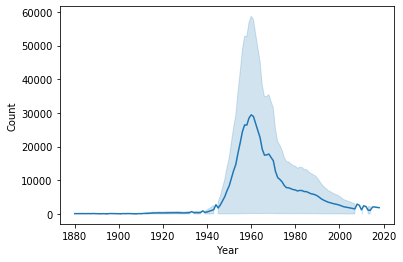

In [21]:
### BEGIN SOLUTION
# plt.plot(names.loc[names.Name == 'Mark', 'Year'], names.loc[names.Name == 'Mark', 'Count'])
# names.loc[names.Name == 'Mark'].plot(kind='line', x='Year', y='Count')
sns.lineplot(x="Year", y='Count', data=names.loc[names.Name == 'Mark'])
plt.show()
### END SOLUTION

Why is there a band around the data? Seaborn, by default, will include error bounds when there are multiple values for each x-value. In this case, there was a period of time that girls were named 'Mark' as well as boys so there were two values for those years. You may have picked up on this by the number of rows in the earlier DataFrame, but visualizing the data helps illuminate subtle details that you may not have noticed otherwise.

**Q2.6.** Again, plot the trend of the popularity of the name 'Mark' over time, but limit the results where Gender is male. Do not forget to include parenthesis.

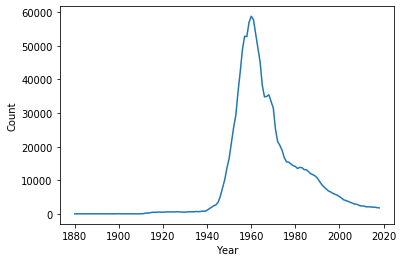

In [22]:
### BEGIN SOLUTION
# names.loc[(names.Name == 'Mark') & (names.Gender == 'M')].plot(kind='line', x='Year', y='Count')
sns.lineplot(x="Year", y="Count", data=names.loc[(names.Name == 'Mark') & (names.Gender == 'M')])
plt.show()
### END SOLUTION

### 3. What were the five most popular baby names in 2000?
We will walk through a few steps in order to see what the most popular baby names around your era. In order to answer this question, we can break it down into a couple of steps:
1. Subset the data to only the year 2000
2. Sort the data on the Count column in descending order
3. Access the first five rows

**Q3.1.** Use a Boolean expression to subset the data to only the year 2000 and assign the resulting DataFrame to the variable `yob_2000`.

In [23]:
### BEGIN SOLUTION
yob_2000 = names.loc[names.Year == 2000]
yob_2000
### END SOLUTION

,Name,Year,Gender,Count
Id,,,,
1332539,Emily,2000,F,25952
1332540,Hannah,2000,F,23073
1332541,Madison,2000,F,19967
1332542,Ashley,2000,F,17995
1332543,Sarah,2000,F,17687
...,...,...,...,...
1362297,Zeph,2000,M,5
1362298,Zeven,2000,M,5
1362299,Ziggy,2000,M,5


In [24]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_2000 = test_df.loc[test_df.Year == 2000]
if yob_2000 is None:
    raise NameError("Did not name your DataFrame correctly")
else:
    pd.testing.assert_frame_equal(yob_2000, test_2000)
### END HIDDEN TESTS

**Q3.2.** Sort the data in descending order by the Count column and assign the result to a DataFrame named `yob_2000_sorted`.

In [25]:
### BEGIN SOLUTION
yob_2000_sorted = yob_2000.sort_values('Count', ascending=False)
yob_2000_sorted
### END SOLUTION

,Name,Year,Gender,Count
Id,,,,
1350191,Jacob,2000,M,34465
1350192,Michael,2000,M,32025
1350193,Matthew,2000,M,28569
1350194,Joshua,2000,M,27531
1332539,Emily,2000,F,25952
...,...,...,...,...
1348436,Guinnevere,2000,F,5
1348437,Guliana,2000,F,5
1348438,Gustavo,2000,F,5


In [26]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
test_2000_sorted = test_2000.sort_values('Count', ascending=False)
if yob_2000_sorted is None:
    raise NameError("Did not name your DataFrame correctly")
else:
    pd.testing.assert_frame_equal(yob_2000_sorted, test_2000_sorted)
### END HIDDEN TESTS

**Q3.3.** Use the `.iloc` operator to output a slice of the first five rows. In other words, do not use the `head` method even though it would be equivalent.

In [27]:
### BEGIN SOLUTION
yob_2000_sorted.iloc[:5]
### END SOLUTION

,Name,Year,Gender,Count
Id,,,,
1350191,Jacob,2000,M,34465
1350192,Michael,2000,M,32025
1350193,Matthew,2000,M,28569
1350194,Joshua,2000,M,27531
1332539,Emily,2000,F,25952


In [28]:
# DO NOT EDIT - this cell is blank for autograding purposes
### BEGIN HIDDEN TESTS
pd.testing.assert_frame_equal(_, test_2000_sorted.iloc[:5])
### END HIDDEN TESTS

Was your name among the most popular? Sometimes it is more fun to look at the most unique names. What were the five most unique names? Continue to explore using indexing in Pandas to become more familiar. In the next two problems for this week, you will get practice at aggregating data and applying functions to Series and DataFrames to make new data.